In [1]:
from deblur_methods import *
import cv2
import os

# General Explenation
Below are examples of how to use the main functions from 'deblur_methods.py'. The functions are run only on a single colour (Red) for the example of use, but for a proper use it is needed to run the blur map and the deblur method on each colour and recombine the result in the end.

Shape of image (1920, 2560)
Shape of focused image (1920, 2560)


Text(0.5, 1.0, 'Ground-Truth Image')

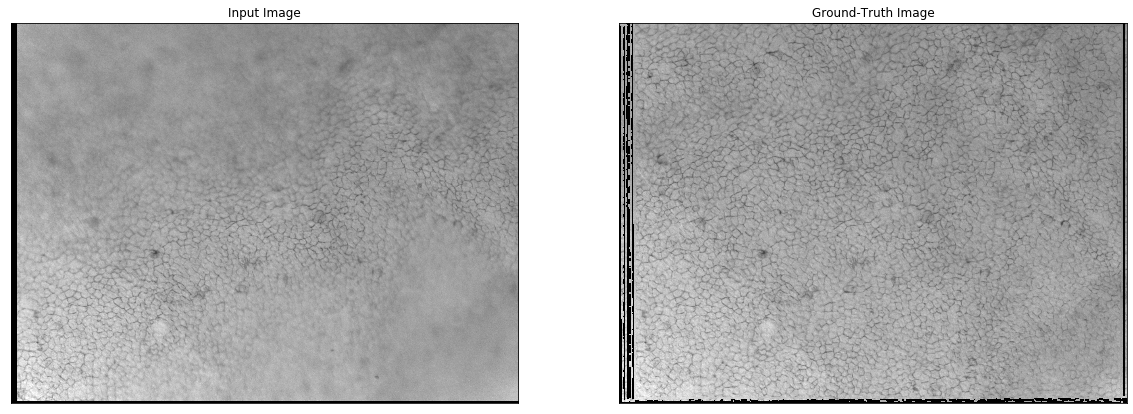

In [2]:
# Importing sharp and blurry images
img = cv2.imread('data\image red staining\Batch1\Batch1Pre0003.tif',cv2.IMREAD_UNCHANGED)[:,:,2]
sharpImg = cv2.imread('data\image red staining\Batch1\Focused_Batch1.tif')[:,:,2]
print('Shape of image',img.shape)
print('Shape of focused image',sharpImg.shape)    
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
display_image(img, axes=ax[0])
ax[0].set_title('Input Image')
display_image(sharpImg, axes=ax[1])
ax[1].set_title('Ground-Truth Image')

# Blur Map
The blur map is common for both methods and provide the basis on which the kernels are based on. 
The bigger the cell size is the more smooth the map is, and the smaller it is the more detailed the resulting map is.
The step size should be as small as possible for higher granularity of the map, but the cost is a high processing time for the map.

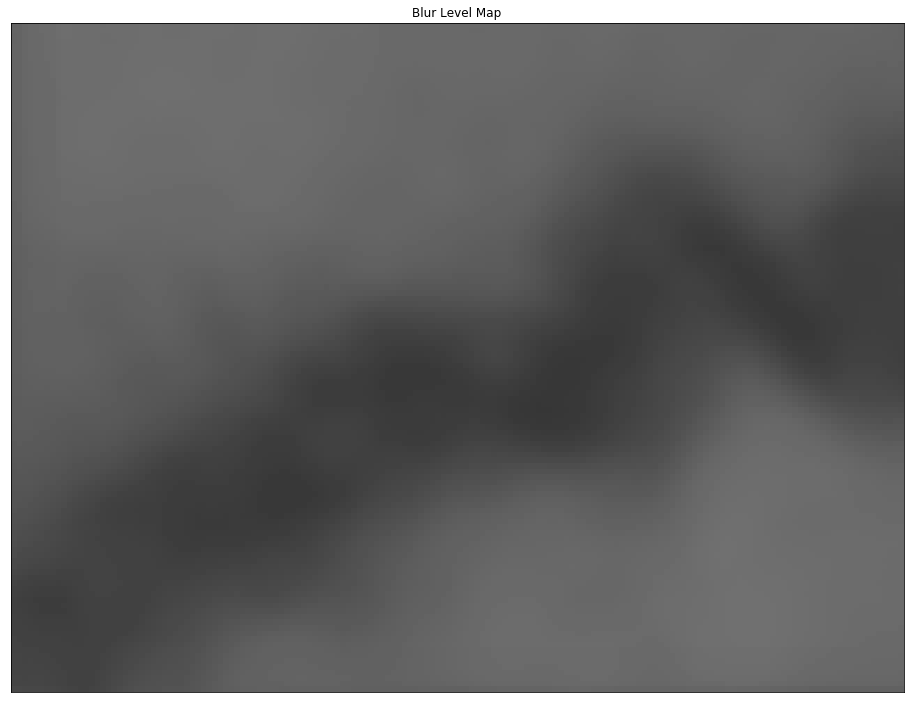

In [3]:
# Generating blur map
# img_blurMap(img, cell_size, step_size, plot=False)
blurMap = img_blurMap(img, 128, 16, plot=True)

# Debluring Using Estimated Gaussian Kernels

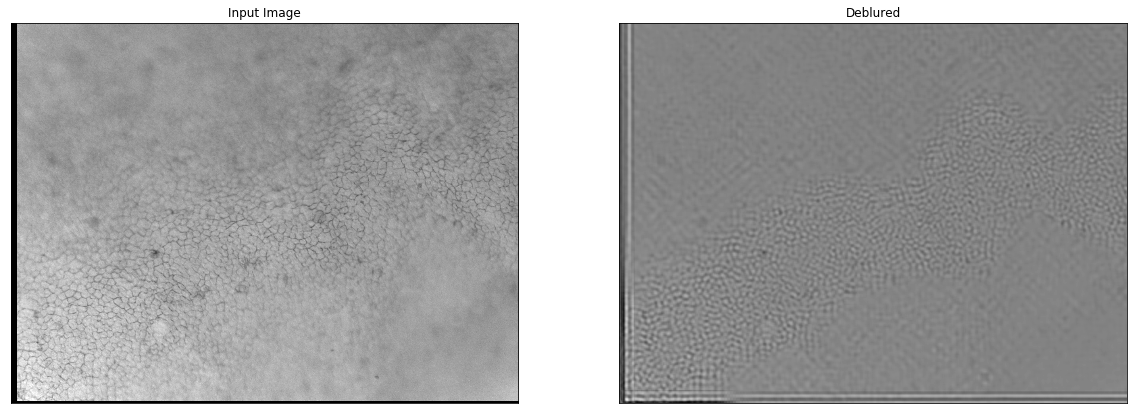

In [4]:
# Deblurring using Estimated Gaussian Kernels Method
# img_deblur_gaussian(img, blurMap, k_size, step_size, sharpImg=None, printPSNR=False, coef=50, plot=False)
deblured_gaussian = img_deblur_gaussian(img, blurMap, 64, 16, coef=42, plot=True)

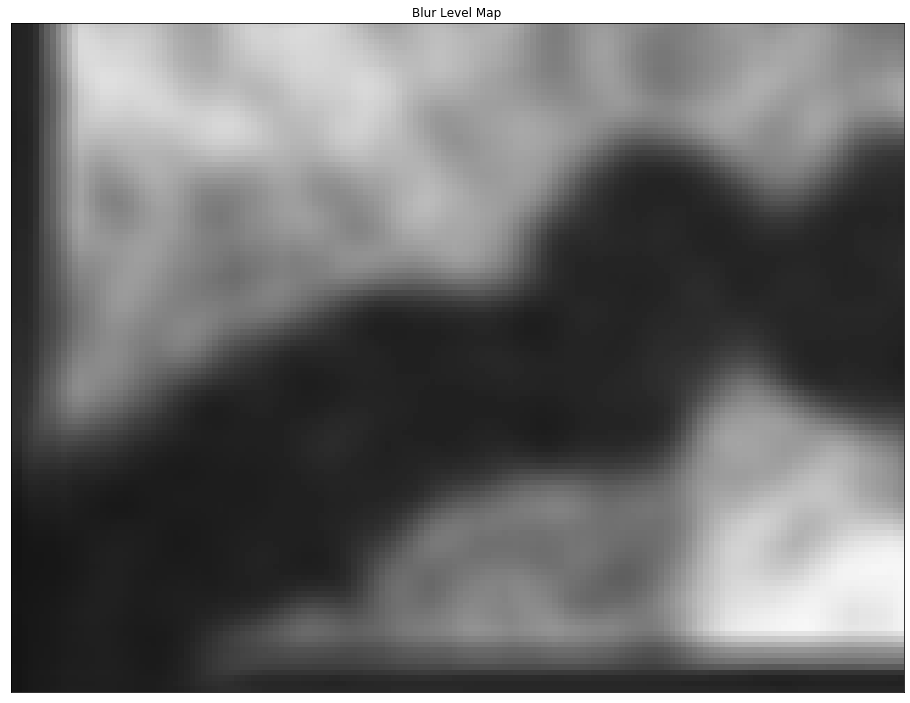

In [5]:
# Blur map of result
deblured_gaussian_blurMap = img_blurMap(deblured_gaussian, 128, 16, plot=True)

# Debluring Using A Kernel Lookup Table

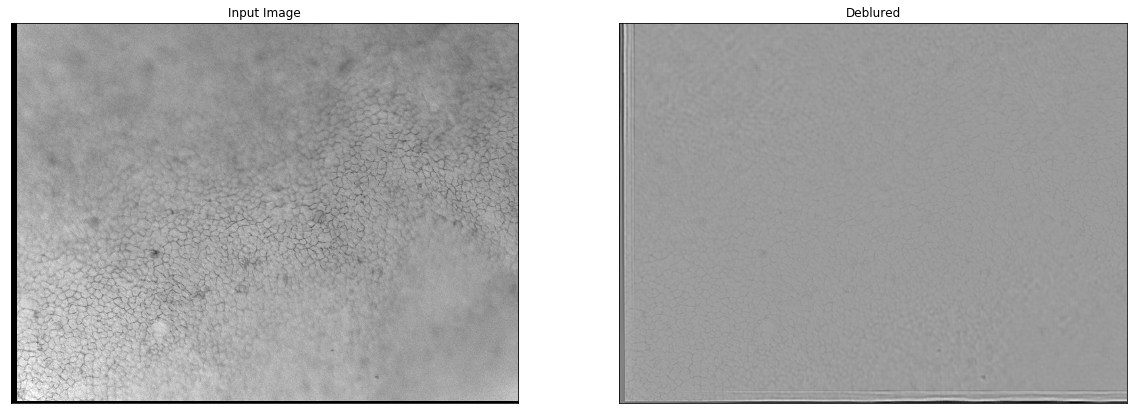

In [6]:
# Deblurring using Estimated Kernels Lookup Table Method
# kernel_lookup_table(imgList, blurMap, sharp, k_size, step_size, resolution=3)
lookupTable = kernel_lookup_table([img], [blurMap], sharpImg, 64, 16, resolution=3)
# img_deblur_lookupTable(img, blurMap, lookupTable, k_size, step_size, resolution=3, sharpImg=None, printPSNR=False, plot=False)
deblured_lookupTable = img_deblur_lookupTable(img, blurMap, lookupTable, 64, 16, resolution=3, plot=True)

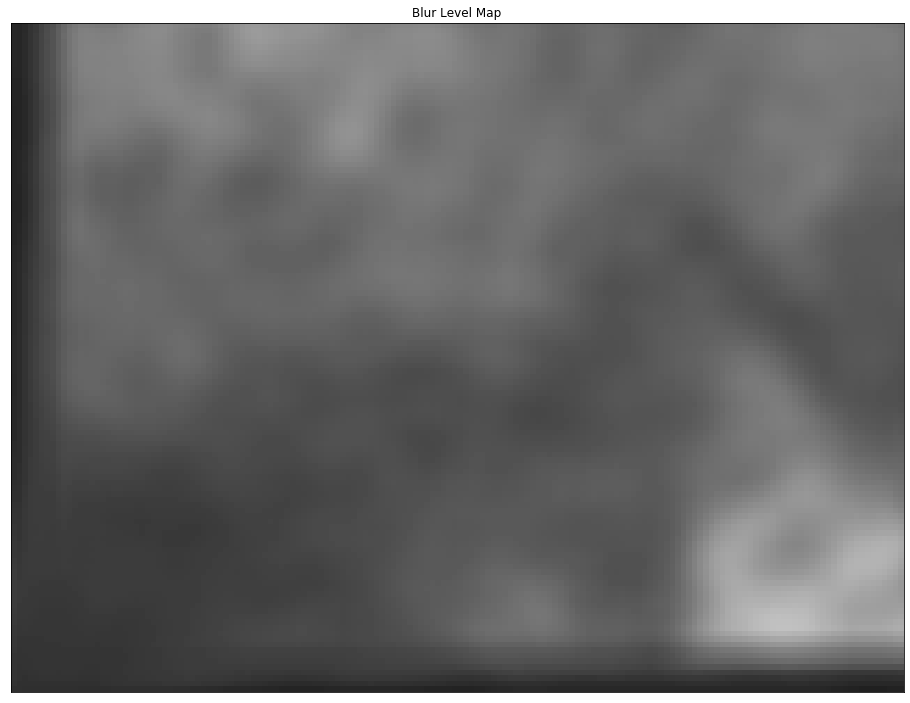

In [7]:
# Blur map of result
deblured_lookupTable_blurMap = img_blurMap(deblured_lookupTable, 128, 16, plot=True)

# Exportation of Results

In [8]:
# Export all images
if not os.path.exists('results'):
    os.makedirs('results')
cv2.imwrite('results/deblured_gaussian.jpg', deblured_gaussian)
cv2.imwrite('results/deblured_gaussian_blurMap.jpg', deblured_gaussian_blurMap*255)
cv2.imwrite('results/deblured_lookupTable.jpg', deblured_lookupTable)
cv2.imwrite('results/deblured_lookupTable_blurMap.jpg', deblured_lookupTable_blurMap*255)

True